1.10.0
1.14.5
char list: {'P': 0, '[': 1, ']': 2, '화': 3, '위': 4, '?': 5, '떻': 6, '드': 7, '4': 8, '1': 9, '이': 10, '호': 11, '0': 12, '.': 13, '뭐': 14, '6': 15, '줘': 16, '주': 17, '실': 18, '니': 19, '연': 20, '기': 21, '관': 22, '다': 23, '쯤': 24, ' ': 25, '야': 26, '게': 27, '는': 28, '돼': 29, '좀': 30, '가': 31, '수': 32, '은': 33, '교': 34, '려': 35, '디': 36, '념': 37, '재': 38, '폰': 39, '층': 40, '입': 41, '전': 42, '춘': 43, '조': 44, '어': 45, '님': 46, '년': 47, '치': 48, '알': 49, '구': 50, '핸': 51, '번': 52}
char size: 53
Model Saved


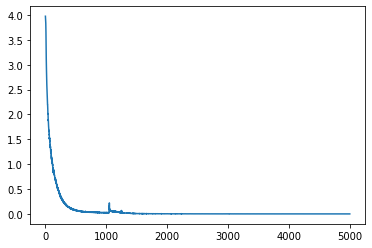

Q: 조재춘 교수님 전화번호 뭐야?
A: 조재춘 교수님 전화번호는 010 입니다.
Q: 조재춘 교수님 연구실이 어디야?
A: 조재춘 교수님 연구실은 60주년 기념관 4층 입니다
Q: 조재춘 교수님 핸드폰
A: 조재춘 교수님 전화번호는 010 입니다.
Model Deleted


In [11]:
import tensorflow as tf
import numpy as np
from konlpy.tag import Okt

# tensorflow와 numpy 그리고 형태소 분석기인 konlpy 사용

print(tf.__version__)
print(np.__version__)

# 학습을 위한 input data
# 라벨은 따로 주지 않고 Q, A 형식으로 작성
# CSV로 작성후 불러와도 되지만 데이터 크기가 크지 않아 파일내 직접 작성
train_data = [
    ['조재춘 교수님 전화번호 뭐야?','조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 전화번호 어떻게 돼?',  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 전화번호 알려줘',  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 전화번호 좀',  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 전화번호', '조재춘 교수님 전화번호는 010 입니다.'],

    ['조재춘 교수님 번호 뭐야?' ,  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 번호 어떻게 돼?',  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 번호 알려줘',  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 번호 좀',  '조재춘 교수님 전화번호는 010 입니다.'],
    ['조재춘 교수님 번호', '조재춘 교수님 전화번호는 010 입니다.'],

    ['조재춘 교수님 핸드폰 번호 뭐야?' ,  '조재춘 교수님 핸드폰번호는 010 입니다.'],
    ['조재춘 교수님 핸드폰 번호 어떻게 돼?',  '조재춘 교수님 핸드폰번호는 010 입니다.'],
    ['조재춘 교수님 핸드폰 번호 알려줘',  '조재춘 교수님 핸드폰번호는 010 입니다.'],
    ['조재춘 교수님 핸드폰 번호 좀',  '조재춘 교수님 핸드폰번호는 010 입니다.'],
    ['조재춘 교수님 핸드폰 번호', '조재춘 교수님 핸드폰번호는 010 입니다.'],

    ['조재춘 교수님 연구실이 어디야?', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다'],
    ['조재춘 교수님 연구실 위치가 어떻게 돼?', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다'],
    ['조재춘 교수님 연구실 위치가 어디쯤이야?', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다'],
    ['조재춘 교수님 연구실 위치 알려줘', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다'],
    ['조재춘 교수님 연구실 위치 좀', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다'],
    ['조재춘 교수님 연구실 좀', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다'],
    ['조재춘 교수님 연구실', '조재춘 교수님 연구실은 60주년 기념관 4층 입니다']]

# 데이터를 배열에 담는다
char_array = []
all_char = ''
for text in train_data:
    all_char += all_char + ''.join(text)
char_array = ['P', '[', ']'] + list(set(all_char))

max_input_text = max(len(string[0]) for string in train_data)
max_output_text = max(len(string[1]) for string in train_data)


num_dic = {n: i for i, n in enumerate(char_array)}
dic_len = len(num_dic)

print(u'char list:', str(num_dic))
print(u'char size:', str(dic_len))

def make_train_data(train_data):
    input_batch = []
    output_batch = []
    target_batch = []

    for seq in train_data:
        input = [num_dic[n] for n in seq[0]+'P' * (max_input_text - len(seq[0]))]# P는 Padding 값
        output = [num_dic[n] for n in ('[' + seq[1] + 'P' * (max_output_text - len(seq[1])))]
        target = [num_dic[n] for n in (seq[1] + 'P' * (max_output_text - len(seq[1])) + ']' )]

        input_batch.append(np.eye(dic_len)[input])
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
    return input_batch, output_batch, target_batch

file_path = './model'

def model_file(file_path, flag):
    if(flag):
        import os
        saver = tf.train.Saver(tf.global_variables())

        if(not os.path.exists(file_path)):
            os.makedirs(file_path)
        saver.save(sess, ''.join(file_path + "/.model"))
        print("Model Saved")
    else:
        import shutil
        try:
            shutil.rmtree(file_path)
            print("Model Deleted")
        except OSError as e:
            if e.errno == 2:
                # 파일이나 디렉토리가 없음!
                print ('No such file or directory to remove')
                pass
            else:
                raise

# Hyper Parameter 옵션 설정
# 하이퍼 파라미터의 옵션의 설정에 따라 학습 결과가 매우 튄다.
# 이는 이쪽 분야의 전문가들도 어떠한 값을 넣었을 때 어떤 값이 나오는지는 경험에 의해 알 수 있음.
# 여기서는 학습경사와 히든레이어수 epoch만 설정하였다.
learning_rate = 0.001
n_hidden = 128
total_epoch = 5000
# one hot 위한 사이즈
n_class = n_input = dic_len

# 그래프 초기화 
tf.reset_default_graph()
# Seq2Seq 모델은 인코더의 입력과 디코더의 입력의 형식이 같다.
enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])

# 인코더
with tf.variable_scope("encoder"):
    enc_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden)
    enc_cell = tf.contrib.rnn.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input,
                                            dtype=tf.float32)

# 디코더
with tf.variable_scope("decoder"):
    dec_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden)
    dec_cell = tf.contrib.rnn.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                            initial_state=enc_states,
                                            dtype=tf.float32)

model = tf.layers.dense(outputs, n_class, activation=None)

# One Hot sparse사용 
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets)
cost = tf.reduce_mean(cross_entropy)
# 옵티마이저는 아담 옵티마이저
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# tf 실행을 위한 세션생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
input_batch, output_batch, target_batch = make_train_data(train_data)

# 최적화가 끝난 뒤, 변수를 저장합니다.
model_file(file_path, True)

import matplotlib.pyplot as plt
# matplotlib으로 시각화
# 학습 데이터를 시각화 해주기 위한 함수
# X축은 total epoch
# Y축은 학습경사

def display_train():
    plot_X = []
    plot_Y = []
    for epoch in range(total_epoch):
        _, loss = sess.run([optimizer, cost],
                           feed_dict={enc_input: input_batch,
                                      dec_input: output_batch,
                                      targets: target_batch})
        plot_X.append(epoch + 1)
        plot_Y.append(loss)
    # Graphic display
    plt.plot(plot_X, plot_Y, label='cost')
    plt.show()

display_train()

# 단어를 입력받아 번역 단어를 예측하고 디코딩하는 함수
def predict(word):
    input_batch, output_batch, target_batch = make_train_data([word])
    # 결과가 [batch size, time step, input] 으로 나오기 때문에,
    # 2번째 차원인 input 차원을 argmax 로 취해 가장 확률이 높은 글자를 예측 값으로 만든다.
    prediction = tf.argmax(model, 2)
    result = sess.run(prediction,
                      feed_dict={enc_input: input_batch,
                                 dec_input: output_batch,
                                 targets: target_batch})
    # 결과 값인 숫자의 인덱스에 해당하는 글자를 가져와 글자 배열을 만든다.
    decoded = [char_array[i] for i in result[0]]
        
    if 'P' in decoded:
        end = decoded.index('P')
        decoded = decoded[:end]
    elif ']' in decoded:
        end = decoded.index(']')
        decoded = decoded[:end] 
    return decoded


# 출력값
print ("Q: 조재춘 교수님 전화번호 뭐야?")
print("A: " + ''.join(predict(['조재춘 교수님 전화번호 뭐야?',''])))
print ("Q: 조재춘 교수님 연구실이 어디야?")
print("A: " + ''.join(predict(['조재춘 교수님 연구실이 어디야?',''])))
print ("Q: 조재춘 교수님 핸드폰")
print("A: " + ''.join(predict(['조재춘 교수님 핸드폰',''])))
# 모델 삭제
model_file(file_path, False)